In [14]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from math import log, exp
set_plot_params()
name = Path().cwd().name + "/likelihood_test"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [2]:
def part(x):
    return x*np.log(x/200)


In [9]:
xs = [52,41,63,44]
D = -2*(200*np.log(1/4)-np.array([part(x) for x in xs]).sum())

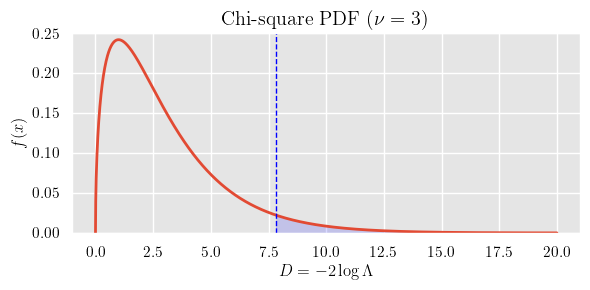

In [31]:
from math import gamma, exp

# --- パラメータ ---
df = 3
alpha = 0.05
# chi2(df=3) の 95%点（ハードコード）
D_crit = 7.814727903251179

# --- PDF定義 ---
def chi2_pdf(x, k):
    c = 1.0 / (2.0**(k/2.0) * gamma(k/2.0))
    y = np.zeros_like(x, dtype=float)
    mask = x > 0
    xm = x[mask]
    y[mask] = c * (xm**(k/2.0 - 1.0)) * np.exp(-xm/2.0)
    return y

# --- 描画 ---
D = np.linspace(0.0, 20.0, 2000)
f = chi2_pdf(D, df)

plt.figure(figsize=(6,3))
plt.plot(D, f, linewidth=2)
plt.xlabel(r"$D = -2 \log{\Lambda}$")
plt.ylabel(r"$f(x)$")
plt.title(r"Chi-square PDF ($\nu=3$)")

# 上側臨界線と棄却域（D >= D_crit）
plt.axvline(D_crit, linestyle="--", linewidth=1, color="blue")
plt.fill_between(D, f, where=(D >= D_crit), alpha=0.15, color="blue")
plt.ylim(0,0.25)

plt.tight_layout()
plt.savefig(save_dir.joinpath("pdf_with_D.png"), dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

plt.show()
